In [37]:

conda install -c menpo wget

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Shankha\Anaconda3

  added / updated specs:
    - wget


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wget-1.16.3                |                0         1.4 MB  menpo
    ------------------------------------------------------------
                                           Total:         1.4 MB

The following NEW packages will be INSTALLED:

  wget               menpo/win-64::wget-1.16.3-0




wget-1.16.3          | 1.4 MB    |            |   0% 
wget-1.16.3          | 1.4 MB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df =pd.read_csv("speed_torque.csv")
df.head(10)


,Speed,Tourque,Unnamed: 2
0,1900,-0.53,NaN
1,1882,0.44,NaN
2,1862,-0.34,NaN
3,1841,-0.25,NaN
4,1822,-0.16,NaN
5,1802,-0.06,NaN
6,1781,0.03,NaN
7,1761,0.12,NaN
8,1742,0.20,NaN
9,1721,0.29,NaN


In [3]:
df.describe()


,Speed,Tourque,Unnamed: 2
count,32.000000,32.00000,0.0
mean,1266.312500,1.43625,NaN
std,605.115155,1.40936,NaN
min,0.000000,-0.53000,NaN
25%,807.250000,0.26750,NaN
50%,1581.000000,0.85500,NaN
75%,1746.750000,2.84250,NaN
max,1900.000000,3.58000,NaN


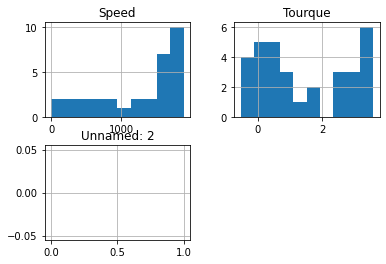

In [4]:
df.hist()
plt.show()

In [5]:
x_data,y_data=df["Speed"].values,df["Tourque"].values

# Data Analysis


In [6]:
import seaborn as sns


In [7]:
df.head()

,Speed,Tourque,Unnamed: 2
0,1900,-0.53,NaN
1,1882,0.44,NaN
2,1862,-0.34,NaN
3,1841,-0.25,NaN
4,1822,-0.16,NaN


# Data wrangling 

In [8]:
#Removing Missing data from Dataframe

df.dropna(axis=1,inplace=True);
df.rename(columns={"Tourque": "Torque"},inplace=True)
df.head()

,Speed,Torque
0,1900,-0.53
1,1882,0.44
2,1862,-0.34
3,1841,-0.25
4,1822,-0.16


# Exploretory Data Analysis

In [18]:


#Corelation between  target variable(Torque) and featureset(Speed)

df.corr()

x_data=df.drop("Torque",axis=1)
y_data=df["Torque"]

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [17]:
# Pearson Corelation to get the corelation between the variabls
# get the P value which signifies the statistical significance of that corelation 
from scipy import stats
pearon_coef,P_value=stats.pearsonr(df["Speed"],df["Torque"])
print(pearon_coef,P_value)

-0.9660104053342966 3.5301185468548036e-19


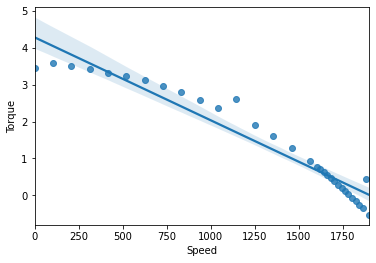

In [13]:
sns.regplot(x_data,y_data,data=df)

# Model Building

In [15]:
#though the correlation implies a strong negetive linear correlation ;
#we can se from visualization that the relation can not be expressed by linear rigression 
#so we will go for polynomunal regression;
import numpy as np
poly=np.polyfit(df["Speed"],df["Torque"],2)
p=np.poly1d(poly)
print(p)

            2
-1.187e-06 x + 0.0002155 x + 3.488


In [43]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(0, 2000)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Torque')

    plt.show()
    plt.close()

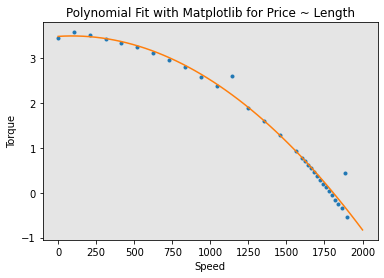

In [44]:
PlotPolly(p,x_data,y_data,"Speed")

In [42]:
#for interactive  visualization 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

In [26]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(df["Speed"], df["Torque"], test_size=test_data, random_state=0)
    
    #x_train_pr = pr.fit_transform(x_train)
    #x_test_pr = pr.fit_transform(x_test)
    polyf =np.polyfit(x_train,y_train,order)
    
    poly=np.poly1d(polyf)
    
    PlotPolly(poly,x_train,y_train,"Speed")
    PlotPolly(poly,x_test,y_test,"Speed")

In [27]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [45]:
sns.distplot()

<function seaborn.distributions.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)>